In [2]:
#Importing Necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

TASK 1

In [3]:
#Task 1
def show(name,n,m,i,Title):
    plt.subplot(n,m,i)
    plt.imshow(name,cmap="gray")
    plt.title(Title)
    plt.axis("off")
    plt.show()

TASK 2

In [4]:
def capture_image():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()
    return frame

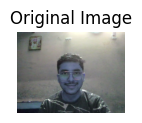

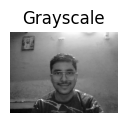

In [6]:
def gray_scale(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return gray

image = capture_image()
cv2.imwrite("Original_Image.jpg", image)
show(image,2,4,1,"Original Image")

gray = gray_scale(image)
show(gray,2,4,2,"Grayscale")

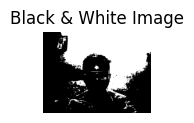

In [8]:
def threshold_binary(img, threshold):
    ret, thresh_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return thresh_img

bw_image = threshold_binary(gray,127)
show(bw_image,2,4,1,"Black & White Image")


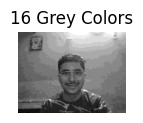

In [9]:
def threshold_gray(img):
    grey_colors = img // 16 * 16
    return grey_colors

grey16_image = threshold_gray(gray)
show(grey16_image,2,4,1,"16 Grey Colors")


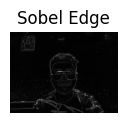

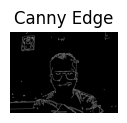

In [10]:
def sobel_edge(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    return cv2.magnitude(sobelx, sobely)

def canny_edge(img, threshold1=50, threshold2=150):
    return cv2.Canny(img, threshold1, threshold2)

sobel_image = sobel_edge(gray)
canny_image = canny_edge(gray)

show(sobel_image,2,4,1,"Sobel Edge")
show(canny_image,2,4,2,"Canny Edge")


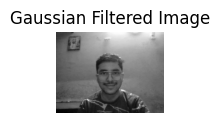

In [11]:
def gaussian_filter(img, kernel_size=5):
    kernel = cv2.getGaussianKernel(kernel_size, sigma=-1)
    gaussian_kernel = np.outer(kernel, kernel.T)
    return cv2.filter2D(img, -1, gaussian_kernel)

blurred_image = gaussian_filter(gray)
show(blurred_image,2,4,1,"Gaussian Filtered Image")


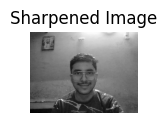

In [12]:
def sharpen_image(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

sharpened_image = sharpen_image(blurred_image)
show(sharpened_image,2,4,1,"Sharpened Image")


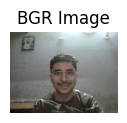

In [19]:
def convert_rgb_to_bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

bgr_image = convert_rgb_to_bgr(image)
show(bgr_image,2,4,1,"BGR Image")

TASK 3

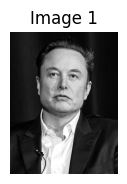

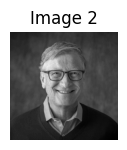

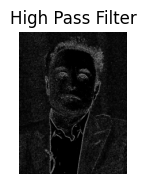

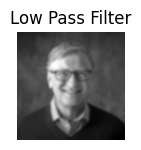

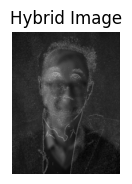

In [69]:
def high_pass_filter(img):
    kernel = np.array([[-2, -2, -2],
                       [-2, 15, -2],
                       [-2, -2, -2]])
    return cv2.filter2D(img, -1, kernel)

def low_pass_filter(img):
    return cv2.GaussianBlur(img, (25, 25), sigmaX=20)

# Load two images
image1 = cv2.imread("C:\\Users\\91997\\Downloads\\Elon.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("C:\\Users\\91997\\Downloads\\Bill.jpg", cv2.IMREAD_GRAYSCALE)

high_filtered = high_pass_filter(image1)
low_filtered = low_pass_filter(image2)

low_filtered_resized = cv2.resize(low_filtered, (high_filtered.shape[1], high_filtered.shape[0]))

hybrid_image = cv2.addWeighted(high_filtered, 0.5, low_filtered_resized, 0.5, 0)

show(image1,2,4,1,"Image 1")
show(image2,2,4,2,"Image 2")
show(high_filtered,2,4,3,"High Pass Filter")
show(low_filtered,2,4,4,"Low Pass Filter")
show(hybrid_image,2,4,5,"Hybrid Image")

TASK 5

In [68]:
from PIL import Image

In [100]:
def classify_flag(image_path):
    image = Image.open(image_path)
    image = image.convert("RGB")
    img_data = np.array(image)

    _,height = image.size

    def mean_color_of_row(img_data, row_index):
        if row_index < 0 or row_index >= img_data.shape[0]:
            raise ValueError("Row index is out of bounds.")

        row_data = img_data[row_index]
        mean_color = np.mean(row_data, axis=0)
        return mean_color

    def is_red(color):
        return color[0] > max(color[1], color[2])

    def is_white(color):
        return ( (abs(color[0] - color[1]) < 50 and abs(color[1] - color[2]) < 50))

    count_white = 0
    count_red = 0
    for i in range(height):
        color = mean_color_of_row(img_data, i)
        if (is_red(color) and count_white == 0):
            count_red = 1
        elif (is_white(color) and count_red == 0):
            count_white = 1
        elif (is_red(color) and count_white == 1):
            count_red = 2
        elif (is_white(color) and count_red == 1):
            count_white = 2

    if (count_red == 1 and count_white == 2):
        return "Indonesia"
    elif (count_red == 2 and count_white == 1):
        return "Poland"

image_path = "C:\\Users\\91997\\Downloads\\Indonesia_26.jpg"
flag = classify_flag(image_path)
print("The flag is:", flag)

The flag is: None
